In [12]:
pip install sqlalchemy pandas matplotlib seaborn pyodbc

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sqlalchemy import create_engine
import pandas as pd
# created by Todd Martin 9/2024
# Define the connection string
connection_string = (
    'mssql+pyodbc://MARTIN/HomeStore?driver=ODBC+Driver+17+for+SQL+Server'
)

# Create the engine
engine = create_engine(connection_string)

# Define the SQL query
query = """
SELECT Order_Date, Sales_person, Sub_Category, Quantity, Round(Sales, 2) as 'Sales', Round(Commission, 2) as 'Commission', Commission_Margin_Status
FROM dbo.Sales_orders
WHERE Order_Date BETWEEN '2024-05-01' AND '2024-05-02'
"""

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql(query, engine)

# Display the DataFrame
print(df)

    Order_Date      Sales_person Sub_Category  Quantity    Sales  Commission  \
0   2024-05-01     Sophia Martin  Accessories         5    48.90        4.40   
1   2024-05-01        John Smith     Supplies         2     3.33        0.07   
2   2024-05-01     Robert Thomas       Tables         4   933.26       93.33   
3   2024-05-01     Robert Thomas       Chairs         5  2803.92      168.24   
4   2024-05-01     Michael Brown    Bookcases         3   314.35       40.87   
5   2024-05-01     Michael Brown       Labels         2     4.61        0.05   
6   2024-05-02  Matthew Thompson  Furnishings         3   129.93       10.39   
7   2024-05-02     Robert Thomas  Accessories         4   159.56       14.36   
8   2024-05-02       Chuck Magee        Paper         5    15.70        0.31   
9   2024-05-02      Laura Taylor          Art         3    59.52        4.76   
10  2024-05-02     Robert Thomas        Paper         5    34.40        0.69   

   Commission_Margin_Status  
0        

In [26]:
from sqlalchemy import create_engine
import pandas as pd
# Created by Todd Martin 9/2024
# Define the connection string
connection_string = (
    'mssql+pyodbc://MARTIN/HomeStore?driver=ODBC+Driver+17+for+SQL+Server'
)

# Create the engine
engine = create_engine(connection_string)

# Get user input for the date range
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Define the SQL query with user input
query = f"""
SELECT Order_Date, Sales_person, Sub_Category, Quantity, ROUND(Sales, 2) as 'Sales'
FROM dbo.Sales_orders
WHERE Order_Date BETWEEN '{start_date}' AND '{end_date}'
"""

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql(query, engine)

# Display the DataFrame
print(df)

Enter the start date (YYYY-MM-DD):  2024-04-04
Enter the end date (YYYY-MM-DD):  2024-04-05


   Order_Date      Sales_person Sub_Category  Quantity   Sales
0  2024-04-04     Anna Andreadi       Phones         4  383.84
1  2024-04-04    James Anderson       Phones         1   41.22
2  2024-04-04  Matthew Thompson     Supplies         1  240.37
3  2024-04-04        John Smith       Phones         2  119.02
4  2024-04-04  Matthew Thompson    Envelopes         1   16.98
5  2024-04-04        John Smith          Art         4    7.04


Sales Data:
    Order_Date      Sales_person Sub_Category  Quantity    Sales  Commission  \
0   2024-05-01     Sophia Martin  Accessories         5    48.90        4.40   
1   2024-05-01        John Smith     Supplies         2     3.33        0.07   
2   2024-05-01     Robert Thomas       Tables         4   933.26       93.33   
3   2024-05-01     Robert Thomas       Chairs         5  2803.92      168.24   
4   2024-05-01     Michael Brown    Bookcases         3   314.35       40.87   
5   2024-05-01     Michael Brown       Labels         2     4.61        0.05   
6   2024-05-02  Matthew Thompson  Furnishings         3   129.93       10.39   
7   2024-05-02     Robert Thomas  Accessories         4   159.56       14.36   
8   2024-05-02       Chuck Magee        Paper         5    15.70        0.31   
9   2024-05-02      Laura Taylor          Art         3    59.52        4.76   
10  2024-05-02     Robert Thomas        Paper         5    34.40        0.69   

   Commission_Margin_Status

C:\Users\todd-\AppData\Local\Temp\ipykernel_25388\4126423664.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Sales_person', data=sales_per_person, palette='viridis')


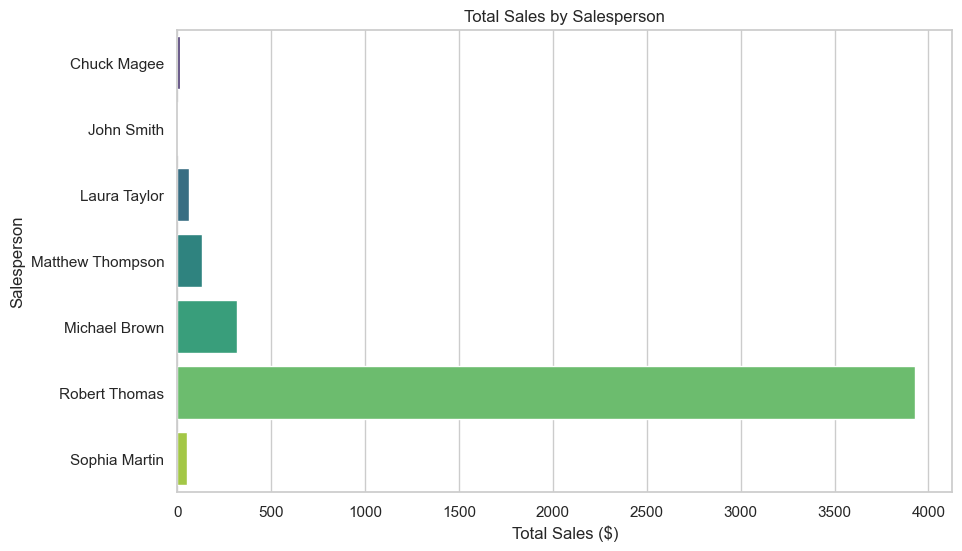

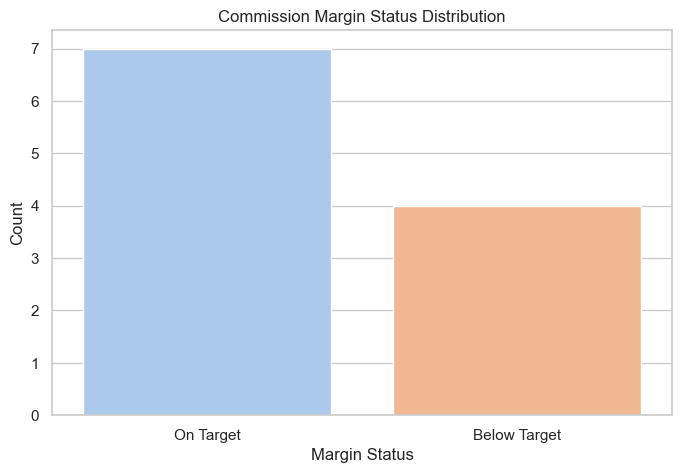

In [24]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Created by Todd Martin 9/2024
# Define the connection string
connection_string = (
    'mssql+pyodbc://MARTIN/HomeStore?driver=ODBC+Driver+17+for+SQL+Server'
)

# Create the engine
engine = create_engine(connection_string)

# Define the SQL query
query = """
SELECT Order_Date, Sales_person, Sub_Category, Quantity, Round(Sales, 2) as Sales, Round(Commission, 2) as Commission, Commission_Margin_Status
FROM dbo.Sales_orders
WHERE Order_Date BETWEEN '2024-05-01' AND '2024-05-02'
"""

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql(query, engine)

# Display the DataFrame
print("Sales Data:")
print(df)

# Data Analysis
# Calculate total sales and average commission
total_sales = df['Sales'].sum()
average_commission = df['Commission'].mean()
sales_per_person = df.groupby('Sales_person')['Sales'].sum().reset_index()

print("\nTotal Sales: ${:.2f}".format(total_sales))
print("Average Commission: ${:.2f}".format(average_commission))
print("\nSales by Person:")
print(sales_per_person)

# Data Visualization
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot total sales by salesperson
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Sales_person', data=sales_per_person, palette='viridis')
plt.title('Total Sales by Salesperson')
plt.xlabel('Total Sales ($)')
plt.ylabel('Salesperson')
plt.show()

# Plot Commission Margin Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Commission_Margin_Status', palette='pastel', hue='Commission_Margin_Status', legend=False)
plt.title('Commission Margin Status Distribution')
plt.xlabel('Margin Status')
plt.ylabel('Count')
plt.show()